#### Question 1

At any time t, given the above conditions and assumptions, what is the unconditioan expectation and unconditional variance of IMB within the next time interval $[t, t+tau)$? That is, calculate $\mathbb{E}[\text{IMB}]\text{ and }Var[\text{IMB}]$.

$$\begin{aligned}
    \mathbb{E}[N(\tau)] &= \sum^{\infty}_{k=0} k P[N(\tau)=k] \\
        &= \sum^{\infty}_{k=0} k \frac{e^{-\lambda\tau}(\lambda\tau)^k}{k!} \\
        &= \sum^{\infty}_{k=0} \frac{e^{-\lambda\tau}(\lambda\tau)^k}{(k-1)!} \\
        &= \lambda\tau e^{-\lambda\tau} \sum^{\infty}_{k=0}\frac{(\lambda\tau)^k}{k!} \\
        &= \lambda\tau e^{-\lambda\tau} e^{\lambda\tau} \\
        &= \lambda\tau \\
    \\
    \mathbb{E}[S_i] &= (1)P[S_i=1] + (-1)P[S_i=-1] \\
        &= p + (-1)(1-p) \\
        &= 2p-1 \\
    \\
    \mathbb{E}[V_i] &= \int^{\infty}_{0} \frac{v}{\beta}e^{-\frac{v}{\beta}}dv \\
        &= \text{by definition } \frac{1}{\frac{1}{\beta}} \\
        &= \beta \\
    \\
    \text{IMB} &= \sum^{N}_{i=1}S_i V_i \\
    \mathbb{E}[\text{IMB}]&=\mathbb{E}_N[\mathbb{E}[\text{IMB}|N]] \\
        &= \mathbb{E}_N[\mathbb{E}[\sum^{N}_{i=1}S_i V_i|N]] \\
        &= \mathbb{E}[N]\mathbb{E}[S_i]\mathbb{E}[V_i] \\
        &= \lambda\tau(2p-1)\beta
\end{aligned}$$

$$\begin{aligned}
    Var[IMB] &= \mathbb{E}[IMB^2] - \mathbb{E}[IMB]^2 \\
    &= \mathbb{E}_N[\mathbb{E}[(\sum^{N}_{i=1}S_i V_i)^2|N]] - \mathbb{E}[IMB]^2 \\
    &= \mathbb{E}_N[\mathbb{E}[\sum^{N}_{j=1}\sum^{N}_{i=1}(S_iS_j V_iV_j)|N]] - \mathbb{E}[IMB]^2 \\
    &= \mathbb{E}_N[\mathbb{E}[2\sum^{N-1}_{j=1}\sum^{N}_{i=1}(S_iS_j V_iV_j) + \sum^{N}_{i=1}(S_i^2 V_i^2)|N]] - \mathbb{E}[IMB]^2 \\
    &= \mathbb{E}[N]\mathbb{E}[2\sum^{N-1}_{j=1}\sum^{N}_{i=1}(S_iS_j V_iV_j)] + \mathbb{E}[N]\mathbb{E}[\sum^{N}_{i=1}(S_i^2 V_i^2)|N]] - \mathbb{E}[IMB]^2 \\
    &= \lambda\tau(\mathbb{E}[2\sum^{N-1}_{j=1}\sum^{N}_{i=1}(S_iS_j V_iV_j)] + \mathbb{E}[\sum^{N}_{i=1}(S_i^2 V_i^2)|N]] - \lambda\tau(2p-1)^2\beta^2)
\end{aligned}$$

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("~/.dracula.mplstyle")
import datetime as dt
from math import lgamma
import statsmodels.api as sm

#### Read and Clean data

In [2]:
def read_folder(folder):
    name = folder[:-1].lower()
    try:
        qte = pd.read_pickle(f"qte_{name}.pkl")
        trd = pd.read_pickle(f"trd_{name}.pkl")
    except FileNotFoundError:
        with open(folder+"dir.txt") as dir:
            data = dir.read().split("\n")[1:-1]

        qte, trd = pd.DataFrame(), pd.DataFrame()

        for q in data[:int(len(data)/2)]:
            q_in = pd.read_csv(folder+q)
            qte = pd.concat([qte, q_in])

        for t in data[int(len(data)/2):]:
            t_in = pd.read_csv(folder+t)
            trd = pd.concat([trd, t_in])

        qte.reset_index(inplace=True)
        trd.reset_index(inplace=True)
        
        qte.to_pickle(f"qte_{name}.pkl")
        trd.to_pickle(f"trd_{name}.pkl")
    return qte, trd

qte_ic, trd_ic = read_folder("SH601398/")
qte_mt, trd_mt = read_folder("SH600519/")

trd_ic["sign"] = (trd_ic["BS"]=='B').astype('int') - (trd_ic["BS"]=='S').astype('int')
trd_mt["sign"] = (trd_mt["BS"]=='B').astype('int') - (trd_mt["BS"]=='S').astype('int')

display(qte_ic.head(), trd_ic.head())

,index,Unnamed: 0,date,time,price,volume,turnover,ntrade,BS,acc_volume,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,BidVolume6,BidVolume7,BidVolume8,BidVolume9,BidVolume10
0,0,1,20130104,91503,0.0000,0,0,0,,0,...,194500,0,0,0,0,0,0,0,0,0
1,1,2,20130104,91507,0.0000,0,0,0,,0,...,783700,0,0,0,0,0,0,0,0,0
2,2,3,20130104,91513,0.0000,0,0,0,,0,...,793700,0,0,0,0,0,0,0,0,0
3,3,4,20130104,91549,0.0000,0,0,0,,0,...,793700,0,0,0,0,0,0,0,0,0
4,4,5,20130104,91553,0.0000,0,0,0,,0,...,794700,0,0,0,0,0,0,0,0,0


,index,Unnamed: 0,date,id_trade,time,sign,BS,price,ntrade
0,0,1,20130104,0,92506000,-1,S,4.1900,2800
1,1,2,20130104,1,92506000,-1,S,4.1900,100
2,2,3,20130104,2,92506000,-1,S,4.1900,2300
3,3,4,20130104,3,92506000,-1,S,4.1900,500
4,4,5,20130104,4,92506000,-1,S,4.1900,5000


#### Question 2
Using the trade data of SH600519, calibrate lambda, beta, p and rho. For the moment, you can set tau to be 5 minutes, or 300 seconds. The observation windows $[t,t+tau)$ for different time points t's can be overlapping or non-overlapping. By overlapping observation windows, one can collect more sample data for below analyses.

lambda, beta, p and rholambda, beta, p and rho presented in order below:

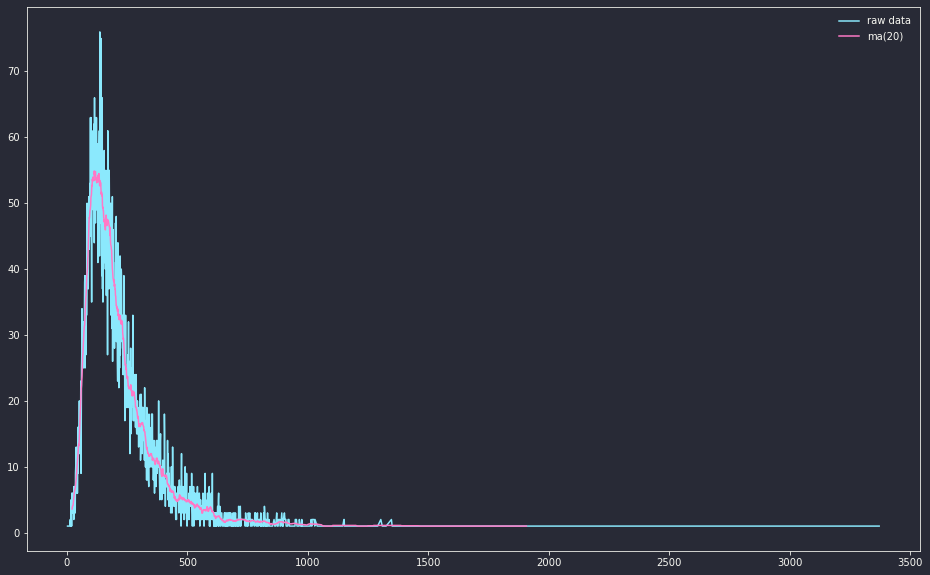

In [3]:
tau = 500000 # represents 5 minutes

ct = pd.cut(trd_mt["time"], np.arange(92500000, 150500000, tau), right=False, include_lowest=True)
n_tau = trd_mt.groupby(["date", ct]).count()["index"].value_counts()
n_tau = n_tau.sort_index()[1:] # first value skipped because it is zeros

n_tau.plot(label="raw data")
n_tau.rolling(20, center=True).mean().plot(label="ma(20)")
plt.legend()
plt.show()

Poisson PDF

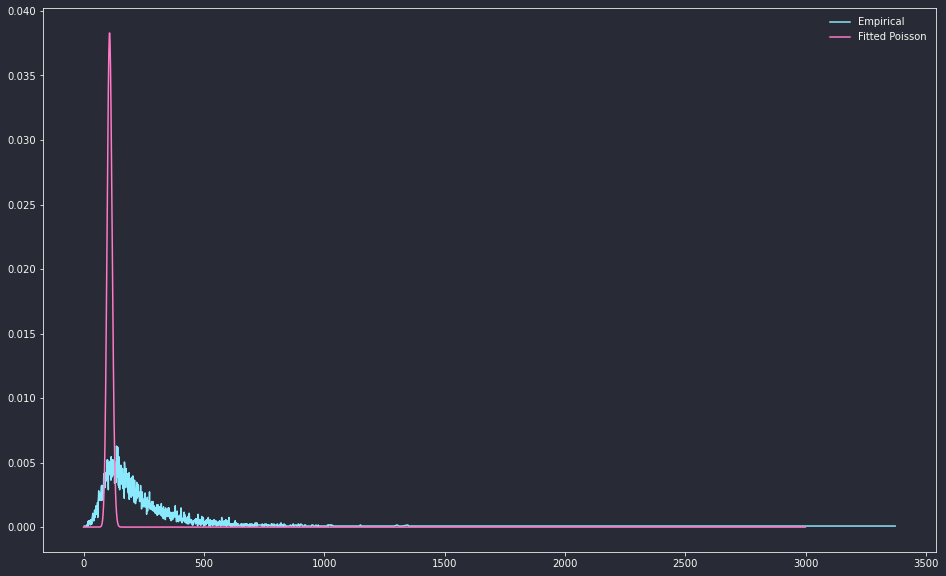

In [4]:
p_n_tau = n_tau / sum(n_tau)
lam = p_n_tau.mean() / 5
tau = 500000

kfact = 1
poisson = []

for k in range(1,3000):
#     kfact *= k
    p = np.exp(-lam*tau+k*np.log(lam*tau)-lgamma(k)) # Logged and exp'd for size
    poisson.append(p)

p_n_tau.plot(label="Empirical")
plt.plot(poisson / sum(poisson), label="Fitted Poisson")
plt.legend()
plt.show()

Lambda fit scale to minutes then down to seconds.

In [5]:
print(f"Lambda (Per Second) = {lam*100000/60:.4f}")

Lambda (Per Second) = 0.3619


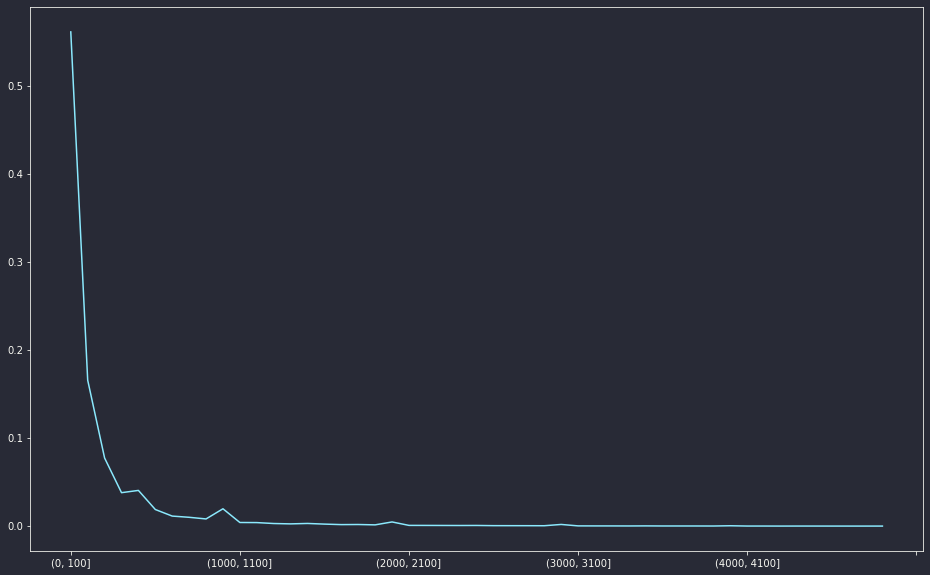

In [6]:
vis = trd_mt["ntrade"].value_counts().sort_index()[1:]
vis = vis.groupby(pd.cut(vis.index, np.arange(0, 5000, 100), right=True)).sum()
vis = vis / vis.sum()
vis.plot()
plt.show()

In [7]:
vis.index = [i.right for i in vis.index]
res = sm.OLS(np.log(vis), sm.add_constant(vis.index)).fit()
beta_inter = np.exp(1/res.params[0])
beta_slope = -1/res.params[1]
# display(res.summary())
print(f"beta using slope= {beta_slope:.4f}")
print(f"beta using intercept= {beta_inter:.4f}")
print(f"betas found using different methods agree -> {beta_slope==beta_inter}")

beta using slope= 830.9389
beta using intercept= 0.7450
betas found using different methods agree -> False


In [8]:
p = sum(trd_mt["BS"]=='B') / len(trd_mt["BS"])
q = sum(trd_mt["BS"]=='S') / len(trd_mt["BS"])

print(f"p={p:.4f}, q={q:.4f}, mid={1-p-q:.4f}")

p=0.4913, q=0.5073, mid=0.0014


Autocorrelation of sign: rho based on linear estimate using 3 datapoints

In [9]:
corrs = []

for l  in range(1,4):
    c = np.corrcoef(trd_mt["sign"][l:], trd_mt["sign"].shift(l)[l:])[0,1]
    corrs.append(c)
    
res = sm.OLS(np.log(corrs), sm.add_constant(range(1,4))).fit()
rho = np.exp(res.params[1])

print(f"rho = {rho:.4f}")

rho = 0.7567


Log distribution of time between trades (not graded)

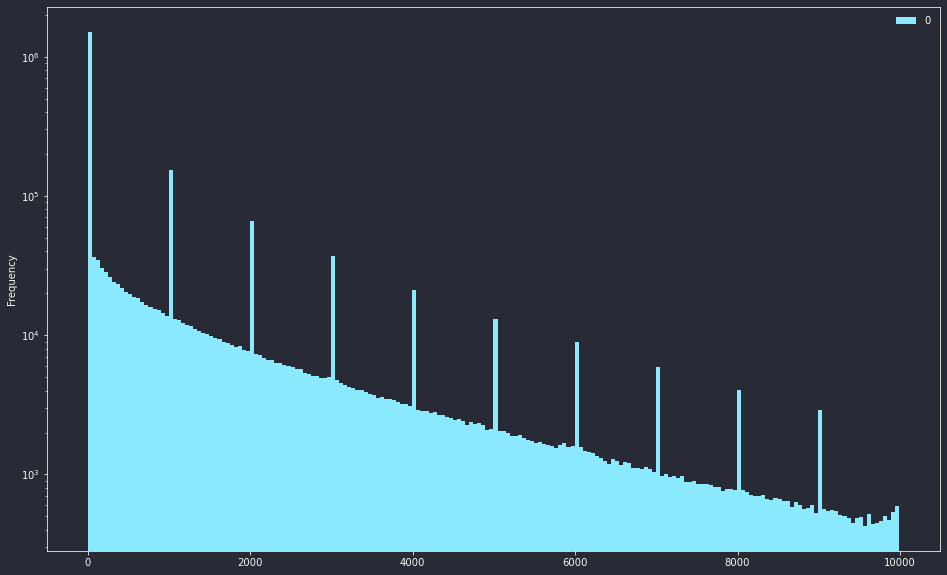

In [10]:
deltat = pd.DataFrame()

for i, j in trd_mt.groupby(trd_mt["date"]):
    deltat = pd.concat([deltat, j["time"].diff()])

fig, axs = plt.subplots()

deltat[deltat<10000].plot.hist(bins=200, ax=axs)
axs.set_yscale("log")
plt.show()

#### Question 3

In the “trade” files attached for both SH600519 and SH601398, the column with header “BS” indicates the sign of each trade, provided by the exchange and can be quite reliable. That is, if it is a “B”, it records the trade as buyer-initiated; otherwise, seller-initiated. For trade data that such trade sign information is not provided (there are many markets where the exchange does not easily provide such information), one can estimate the sign of each trade using a relatively simple version of the so call “Lee and Ready Algorithm”: for each trade, compare the trade price with its “prevailing” quote; if the trade price is above the mid-quote of the prevailing quote, label this trade as a “buyer-initiated” trade that has a sign of +1; if the trade price is below the mid-quote of the prevailing quote, label this trade as a “seller-initiated” trade that has a sign of -1; if the trade price is exactly at the mid-quote, assign 0 to its trade sign. Note that mid-quote is defined here as the simple average of bid1 and ask1 of the order book. Please use the data provided to check that, for both SH600519 and SH601398, what is the accuracy of this simple version of the Lee and Ready algorithm, using the exchange-provided information in the column “BS” as a benchmark. Please use as large sample size as possible from the attached files.

In [11]:
qte_ic["mid"] = (qte_ic["BidPrice1"]*qte_ic["BidVolume1"]+qte_ic["AskPrice1"]*qte_ic["AskVolume1"]) / (qte_ic["BidVolume1"]+qte_ic["AskVolume1"])
qte_ic["dtti"] = qte_ic["date"]*1000000+qte_ic["time"]
trd_ic["dtti"] = (trd_ic["date"]*1000000+trd_ic["time"]/1000).astype("int")
tq_ic = pd.merge_asof(trd_ic, qte_ic, on="dtti")
tq_ic["pred_sign"] = (tq_ic["price_x"] > tq_ic["mid"]).astype("int") - (tq_ic["price_x"] < tq_ic["mid"]).astype("int")
tq_ic["pred_right"] = tq_ic["pred_sign"]==tq_ic["sign"]

qte_mt["mid"] = (qte_mt["BidPrice1"]*qte_mt["BidVolume1"]+qte_mt["AskPrice1"]*qte_mt["AskVolume1"]) / (qte_mt["BidVolume1"]+qte_mt["AskVolume1"])
qte_mt["dtti"] = qte_mt["date"]*1000000+qte_mt["time"]
trd_mt["dtti"] = (trd_mt["date"]*1000000+trd_mt["time"]/1000).astype("int")
tq_mt = pd.merge_asof(trd_mt, qte_mt, on="dtti")
tq_mt["pred_sign"] = (tq_mt["price_x"] > tq_mt["mid"]).astype("int") - (tq_mt["price_x"] < tq_mt["mid"]).astype("int")
tq_mt["pred_right"] = tq_mt["pred_sign"]==tq_mt["sign"]

ic_right = tq_ic["pred_right"].sum() / len(tq_ic["pred_right"])
mt_right = tq_mt["pred_right"].sum() / len(tq_mt["pred_right"])

print(f"P[SH601398 ICBC   Correct] = {ic_right:.4f}")
print(f"P[SH600519 Moutai Correct] = {mt_right:.4f}")

P[SH601398 ICBC   Correct] = 0.9476
P[SH600519 Moutai Correct] = 0.8042


#### Question 4

For both SH600519 and SH601398, calibrate the four
parameters: $\beta^+$, $\beta^-$, $\gamma^+$ and $\gamma^-$ in formulas (10) for two cases: (1) = 5 minutes, or
300 seconds; (2) = 1 minutes, or 60 seconds. Check if there are significant differences between the two cases and comment on them, if any.

In [12]:
def imb_mid(tq, tau):
    def imb(tq_gb):
        """takes in Trade Quote grouped by date and tau"""
        return tq_gb["sign"] @ tq_gb["ntrade_x"] / tq_gb["ntrade_x"].mean()

    def last_mid(tq_gb):
        """takes in Trade Quote grouped by date and tau"""
        return tq_gb["mid"].values[-1]
    
    ct = pd.cut(tq["time_x"], np.arange(92500000, 150000000+tau, tau), right=False, include_lowest=True)
    imbal = tq.groupby(["date_x", ct]).apply(imb)
    mid = tq.groupby(["date_x", ct]).apply(last_mid)

    ts = pd.concat([imbal, mid], axis=1)
    ts.columns = ["IMB", "mid"]
    ts.reset_index(inplace=True)

    rets = [df["mid"].pct_change() for dt, df in ts.groupby("date_x")]

    ts["ret"] = pd.concat(rets, axis=0).reset_index(drop=True)
    ts.dropna(inplace=True)
    sig = ts["ret"].std()
    return ts, sig

tau = 500000 # 5 minutes
ts_ic, sig_ic = imb_mid(tq_ic, tau)

ts_ic.head()

,date_x,time_x,IMB,mid,ret
1,20130104,"[93000000, 93500000)",-322.1498,4.2165,0.0063
2,20130104,"[93500000, 94000000)",291.2314,4.2121,-0.0010
3,20130104,"[94000000, 94500000)",159.1618,4.2185,0.0015
4,20130104,"[94500000, 95000000)",-99.7305,4.2075,-0.0026
5,20130104,"[95000000, 95500000)",-62.6485,4.1905,-0.0040


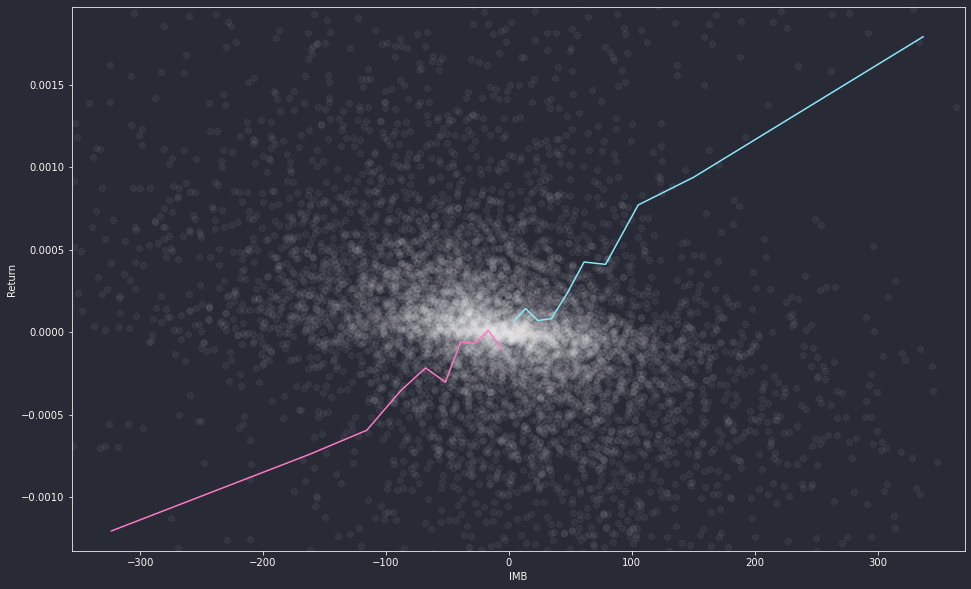

/Users/plee/miniconda3/envs/finmath/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
def plot_regress(ts, sig, plot=False):
    imbpos = ts[ts["IMB"]>0]
    imbneg = ts[ts["IMB"]<0]

    nbuck = 10
    bord = 1.1

    bucketpos = imbpos.groupby(pd.qcut(imbpos["IMB"], nbuck)).mean()
    bucketneg = imbneg.groupby(pd.qcut(imbneg["IMB"], nbuck)).mean()
    
    if plot:
        plt.scatter(ts["IMB"], ts["ret"], color="w", alpha=0.05)
        plt.plot(bucketpos["IMB"], bucketpos["ret"])
        plt.plot(bucketneg["IMB"], bucketneg["ret"])

        plt.xlabel("IMB")
        plt.ylabel("Return")
        plt.xlim([min(bucketneg["IMB"])*bord, max(bucketpos["IMB"])*bord])
        plt.ylim([min(bucketneg["ret"])*bord, max(bucketpos["ret"])*bord])
        plt.show()
    
    Y = np.log(np.maximum(bucketpos["ret"],0.00001)/sig)
    X = sm.add_constant(np.log(bucketpos["IMB"]))
    respos = sm.OLS(Y, X).fit()
    
    Y = np.log(np.maximum(-bucketneg["ret"],0.00001)/sig)
    X = sm.add_constant(np.log(-bucketneg["IMB"]))
    resneg = sm.OLS(Y, X).fit()
    return respos, resneg

respos_ic, resneg_ic = plot_regress(ts_ic, sig_ic, plot=True)

Question 4 answers below:

In [14]:
def res_beta_gamma(respos, resneg):
    beta_pos = np.exp(respos.params[0])
    gamma_pos = respos.params[1]
    beta_neg = np.exp(resneg.params[0])
    gamma_neg = resneg.params[1]
    
    print(f"beta^+  = {beta_pos:.4f}\ngamma^+ = {gamma_pos:.4f}")
    print(f"beta^-  = {beta_neg:.4f}\ngamma^- = {gamma_neg:.4f}")

print(f"SH601398 ICBC")
print(f"tau = {tau/100000}")
res_beta_gamma(respos_ic, resneg_ic)

SH601398 ICBC
tau = 5.0
beta^+  = 0.0048
gamma^+ = 0.8369
beta^-  = 0.0016
gamma^- = 0.9807


In [15]:
tau = 100000 # 1 minute
ts_ic, sig_ic = imb_mid(tq_ic, tau)
respos_ic, resneg_ic = plot_regress(ts_ic, sig_ic, plot=False)

print(f"SH601398 ICBC")
print(f"tau = {tau/100000}")
res_beta_gamma(respos_ic, resneg_ic)

SH601398 ICBC
tau = 1.0
beta^+  = 0.0036
gamma^+ = 0.8011
beta^-  = 0.0021
gamma^- = 0.9039


In [16]:
tau = 500000 # 5 minutes
ts_mt, sig_mt = imb_mid(tq_mt, tau)
respos_mt, resneg_mt = plot_regress(ts_mt, sig_mt, plot=False)

print(f"SH600519 Moutai")
print(f"tau = {tau/100000}")
res_beta_gamma(respos_mt, resneg_mt)

SH600519 Moutai
tau = 5.0
beta^+  = 0.0014
gamma^+ = 1.1865
beta^-  = 0.0006
gamma^- = 1.3899


In [17]:
tau = 100000 # 1 minute
ts_mt, sig_mt = imb_mid(tq_mt, tau)
respos_mt, resneg_mt = plot_regress(ts_mt, sig_mt, plot=False)

print(f"SH600519 Moutai")
print(f"tau = {tau/100000}")
res_beta_gamma(respos_mt, resneg_mt)

SH600519 Moutai
tau = 1.0
beta^+  = 0.0042
gamma^+ = 0.8922
beta^-  = 0.0054
gamma^- = 0.8740


For SH601398 ICBC, there is no significant difference in $\beta$ and $\gamma$ values when changing $\tau$, although they may be within a margin of error. For SH600519 Moutai, there is a slight, non-negligible difference between  $\beta$ and $\gamma$. It is worth noting that  $\beta$ and $\gamma$ values for $\text{IMB}^+$ and $\text{IMB}^-$ in all regression results are symmetric, fulfilling our expectation of the shape of the distribution.